<a href="https://colab.research.google.com/github/Demon-Sheriff/Linear-Alg_ML_fs/blob/master/SWE_Math_Weekly_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1GQvrdQ3JSoPYimoQ6lsexeic2_9nSW_c

Downloading...
From: https://drive.google.com/uc?id=1GQvrdQ3JSoPYimoQ6lsexeic2_9nSW_c
To: /content/swe_math_weekly_2_creators.csv
100% 1.19k/1.19k [00:00<00:00, 3.89MB/s]


In [ ]:
!gdown 18MloovE8Qztki6JAZUTdINJEpEKxLsYZ

Downloading...
From: https://drive.google.com/uc?id=18MloovE8Qztki6JAZUTdINJEpEKxLsYZ
To: /content/swe_math_weekly_2_data.csv
100% 398k/398k [00:00<00:00, 88.7MB/s]


# Problem statement:
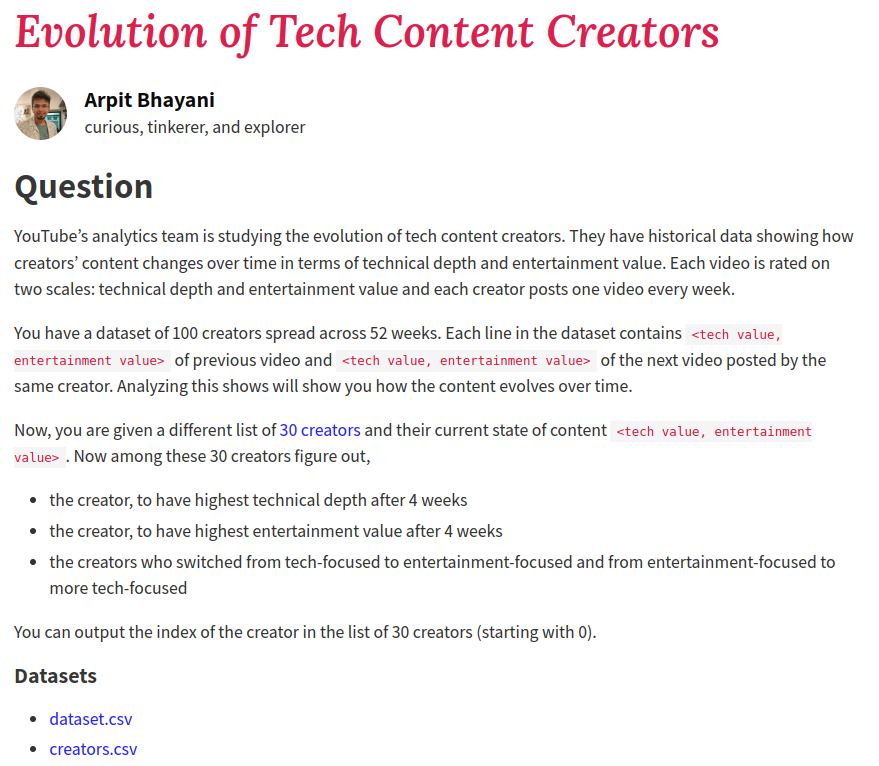

#### [Link to the problem](arpitbhayani.me/math/2)

In [ ]:
path = '/content/swe_math_weekly_2_data.csv'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv(path)

In [ ]:
data.shape

(5200, 4)

In [ ]:
data

,prev_vid_tech_val,prev_vid_entertainment_val,next_vid_tech_val,next_vid_entertainment_val
0,0.749648,0.128190,0.507638,0.056335
1,0.448262,0.475094,0.480678,0.468935
2,0.283520,0.198778,0.265403,0.216995
3,0.446370,0.458711,0.284013,0.545493
4,0.319405,0.422553,0.259517,0.402467
...,...,...,...,...
5195,0.504105,0.609731,0.352148,0.605663
5196,0.300423,0.366284,0.237251,0.399912
5197,0.469513,0.456304,0.508510,0.524075
5198,0.247487,0.797555,0.217224,0.764939


In [ ]:
df = data

In [ ]:
df.iloc[:, 1]

,prev_vid_entertainment_val
0,0.128190
1,0.475094
2,0.198778
3,0.458711
4,0.422553
...,...
5195,0.609731
5196,0.366284
5197,0.456304
5198,0.797555


In [ ]:
x_prev = df.iloc[:,0]
y_prev = df.iloc[:,1]

In [ ]:
x_prev

,prev_vid_tech_val
0,0.749648
1,0.448262
2,0.283520
3,0.446370
4,0.319405
...,...
5195,0.504105
5196,0.300423
5197,0.469513
5198,0.247487


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='prev_vid_tech_val', ylabel=' prev_vid_entertainment_val'>

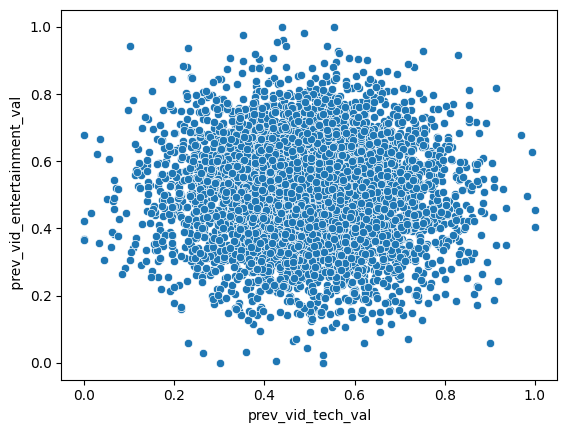

In [ ]:
sns.scatterplot(x = x_prev, y = y_prev)

In [ ]:
df.iloc[:, 2]

,next_vid_tech_val
0,0.507638
1,0.480678
2,0.265403
3,0.284013
4,0.259517
...,...
5195,0.352148
5196,0.237251
5197,0.508510
5198,0.217224


In [ ]:
x_next = df.iloc[:, 2]
y_next = df.iloc[:, 3]

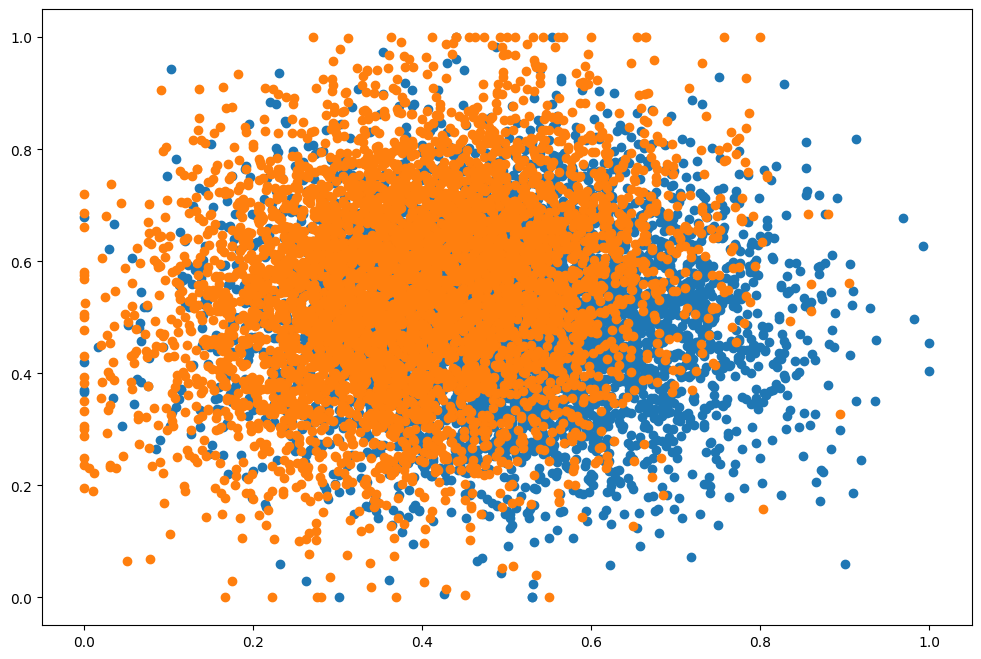

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(12, 8))  # Adjust size with figsize
plt.scatter(x_prev, y_prev)
# sns.scatterplot(x = x_prev, y = y_prev)

plt.subplot(1, 1, 1)
plt.scatter(x_next, y_next)
# sns.scatterplot(x = x_next, y = y_next)

plt.show()

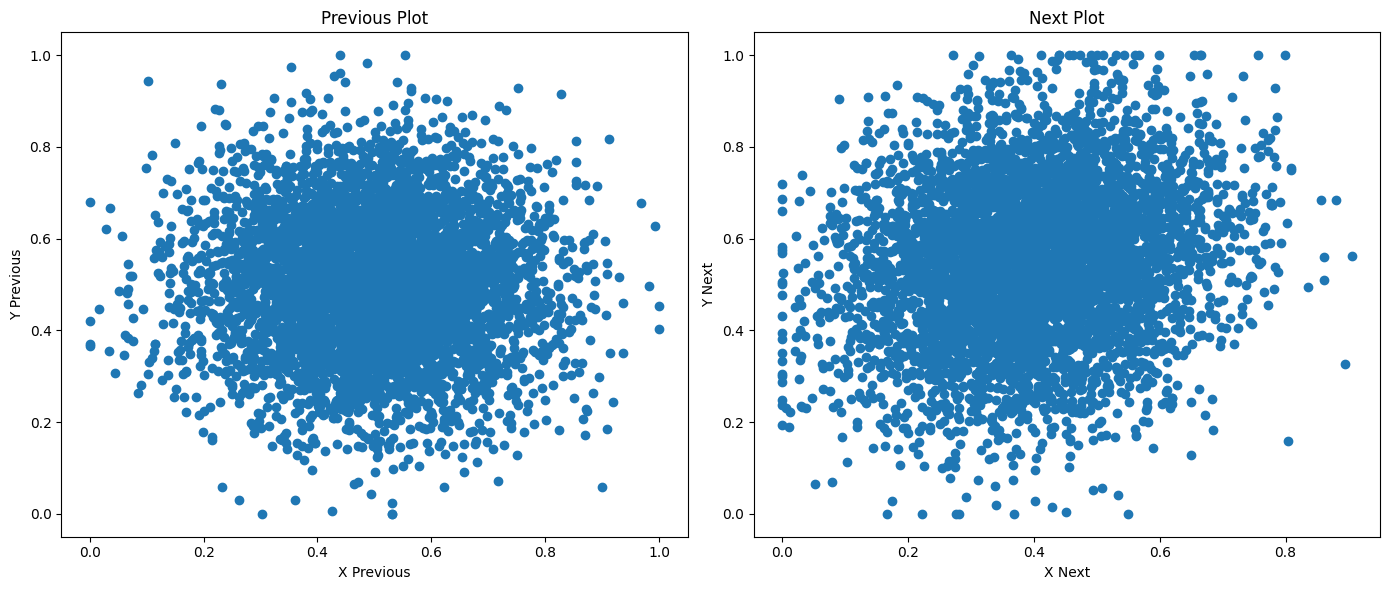

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(x_prev, y_prev)
axes[0].set_title('Previous Plot')
axes[0].set_xlabel('X Previous')
axes[0].set_ylabel('Y Previous')

axes[1].scatter(x_next, y_next)
axes[1].set_title('Next Plot')
axes[1].set_xlabel('X Next')
axes[1].set_ylabel('Y Next')

plt.tight_layout()

plt.show()

# **Short Term prediction : Approach 1** **(Utilising Transition Matrices)**

In [ ]:
import numpy as np

In [ ]:
# calcuate the transition matrix
# x(t+1) = A.xt
# => A = x(t + 1).inv(x(t))

In [ ]:
# compute the pseudo-inverse of X_prev
X_prev = np.array([x_prev, y_prev])
X_prev_inv = np.linalg.pinv(np.array([x_prev, y_prev]))  # use pinv to handle non-invertible cases
X_next = np.array([x_next, y_next])

# Calculate transition matrix A
a = np.dot(X_next, X_prev_inv)

In [ ]:
a

array([[0.70500624, 0.09087316],
       [0.19902547, 0.89926622]])

In [ ]:
# trying to check the transition matrix.
X_pred = np.dot(a, X_prev)

In [ ]:
X_pred_next_tech = X_pred[0, :]
X_pred_next_ent = X_pred[1, :]

In [ ]:
X_next

array([[0.5076381 , 0.4806783 , 0.26540263, ..., 0.50851044, 0.21722432,
        0.47214891],
       [0.05633512, 0.46893454, 0.21699514, ..., 0.524075  , 0.76493928,
        0.60797496]])

In [ ]:
X_next[0, :]

array([0.5076381 , 0.4806783 , 0.26540263, ..., 0.50851044, 0.21722432,
       0.47214891])

In [ ]:
X_next[1, :]

array([0.05633512, 0.46893454, 0.21699514, ..., 0.524075  , 0.76493928,
       0.60797496])

In [ ]:
from sklearn.metrics import mean_squared_error

tec_err = np.round(mean_squared_error(X_next[0, :], X_pred_next_tech), 2)
ent_err = np.round(mean_squared_error(X_next[1, :], X_pred_next_ent), 2)

print(f"tech err : {tec_err}")
print(f"ent err : {ent_err}")

tech err : 0.01
ent err : 0.01


In [ ]:
# makeing the predictions for the creators.csv
path_creators = '/content/swe_math_weekly_2_creators.csv'

In [ ]:
creators = pd.read_csv(path_creators)

In [ ]:
creators.head()

,curr_vid_tech_val,curr_vid_ent_val
0,0.810302,0.031501
1,0.860748,0.148862
2,1.020412,0.272798
3,0.728380,0.105934
4,0.759339,0.148463


In [ ]:
creators.shape

(30, 2)

In [ ]:
# prediction after 4 weeks
a_4 = np.linalg.matrix_power(a, 4)

In [ ]:
a_4

array([[0.31189644, 0.19562721],
       [0.42845213, 0.73008966]])

In [ ]:
X_test = np.array([creators.iloc[:, 0], creators.iloc[:, 1]])

In [ ]:
X_test.shape

(2, 30)

In [ ]:
a_4

array([[0.31189644, 0.19562721],
       [0.42845213, 0.73008966]])

In [ ]:
preds = np.dot(a_4, X_test)

In [ ]:
final_preds = preds.T

In [ ]:
final_preds

array([[0.25889255, 0.37017369],
       [0.29758574, 0.47747182],
       [0.37162947, 0.63636443],
       [0.24790284, 0.3894176 ],
       [0.26587857, 0.43373171],
       [0.30308594, 0.58717598],
       [0.38073153, 0.74253066],
       [0.3882636 , 0.65830611],
       [0.25127431, 0.47010612],
       [0.30961368, 0.51203767],
       [0.20225662, 0.29517016],
       [0.25096792, 0.33723669],
       [0.27217978, 0.47936327],
       [0.30763275, 0.53920095],
       [0.27128148, 0.52873403],
       [0.20082327, 0.54249025],
       [0.19095121, 0.52101233],
       [0.23247357, 0.65053969],
       [0.23389587, 0.60701039],
       [0.20316136, 0.6099789 ],
       [0.18662778, 0.53981014],
       [0.15045415, 0.46176723],
       [0.17094103, 0.56575805],
       [0.22519524, 0.58526321],
       [0.22131522, 0.66473625],
       [0.2703034 , 0.65444713],
       [0.23174293, 0.67748228],
       [0.20370244, 0.6071731 ],
       [0.17597968, 0.56856886],
       [0.16900736, 0.52417279]])

In [ ]:
final_tech_val = final_preds[:, 0]
final_ent_val = final_preds[:, 1]

In [ ]:
final_tech_val

array([0.25889255, 0.29758574, 0.37162947, 0.24790284, 0.26587857,
       0.30308594, 0.38073153, 0.3882636 , 0.25127431, 0.30961368,
       0.20225662, 0.25096792, 0.27217978, 0.30763275, 0.27128148,
       0.20082327, 0.19095121, 0.23247357, 0.23389587, 0.20316136,
       0.18662778, 0.15045415, 0.17094103, 0.22519524, 0.22131522,
       0.2703034 , 0.23174293, 0.20370244, 0.17597968, 0.16900736])

In [ ]:
# creator with max tech val after 4 weeks.
np.argmax(final_tech_val), np.max(final_tech_val)

(7, 0.38826360465316456)

In [ ]:
# creator with highest ent val after 4 weeks.
np.argmax(final_ent_val), np.max(final_ent_val)

(6, 0.742530655269049)

In [ ]:
curr_tech_val = X_test.T[:, 0]
curr_ent_val = X_test.T[:, 1]
X_test.T

array([[ 0.81030159,  0.03150058],
       [ 0.86074837,  0.14886164],
       [ 1.02041179,  0.27279776],
       [ 0.7283803 ,  0.10593427],
       [ 0.75933921,  0.14846288],
       [ 0.7395112 ,  0.37027072],
       [ 0.92225941,  0.47581368],
       [ 1.07497934,  0.27082828],
       [ 0.63578949,  0.2707897 ],
       [ 0.87478257,  0.18797036],
       [ 0.62491304,  0.03756366],
       [ 0.81487218, -0.01629531],
       [ 0.72927344,  0.22860824],
       [ 0.82780308,  0.25274562],
       [ 0.65759568,  0.33829511],
       [ 0.28140659,  0.57790299],
       [ 0.26051766,  0.56074343],
       [ 0.29509813,  0.71786289],
       [ 0.36149298,  0.61927731],
       [ 0.20151806,  0.71722433],
       [ 0.2130259 ,  0.61436118],
       [ 0.13558996,  0.55290939],
       [ 0.09815879,  0.71731151],
       [ 0.34691366,  0.59804616],
       [ 0.21918308,  0.78185849],
       [ 0.48172504,  0.61369314],
       [ 0.25476232,  0.77843703],
       [ 0.20807789,  0.7095316 ],
       [ 0.11990232,

In [ ]:
#computing the diff between current ent_vals and ent_vals after 4 weeks to check for transitioning
diff_ent = (final_ent_val - curr_ent_val)
diff_ent

array([ 0.33867311,  0.32861018,  0.36356667,  0.28348333,  0.28526884,
        0.21690525,  0.26671697,  0.38747783,  0.19931642,  0.32406731,
        0.2576065 ,  0.35353199,  0.25075503,  0.28645534,  0.19043892,
       -0.03541274, -0.03973111, -0.0673232 , -0.01226691, -0.10724542,
       -0.07455104, -0.09114216, -0.15155345, -0.01278295, -0.11712224,
        0.04075399, -0.10095475, -0.1023585 , -0.13983243, -0.10875933])

In [ ]:
# computing the difference between current tech_vals and the tech_vals after 4 weeks to check who transitioned ?
diff_tech = (final_tech_val - curr_tech_val)
diff_tech

array([-0.55140904, -0.56316264, -0.64878232, -0.48047745, -0.49346064,
       -0.43642526, -0.54152788, -0.68671573, -0.38451518, -0.56516889,
       -0.42265641, -0.56390426, -0.45709366, -0.52017033, -0.3863142 ,
       -0.08058333, -0.06956646, -0.06262456, -0.12759712,  0.0016433 ,
       -0.02639812,  0.01486419,  0.07278224, -0.12171842,  0.00213214,
       -0.21142164, -0.02301939, -0.00437545,  0.05607735,  0.02412397])

In [ ]:
tech_val_inc = np.where(diff_tech > 0) # people whose tech_val increased after 4 weeks
tech_val_inc

(array([19, 21, 22, 24, 28, 29]),)

In [ ]:
ent_val_inc = np.where(diff_ent > 0)
ent_val_inc

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 25]),)

In [ ]:
# people who switched to more tech focused would be the people who have final_tech_val > final_ent_val
np.where(final_tech_val > final_ent_val) # 0 (DAMN)

(array([], dtype=int64),)

In [ ]:
# people who switched to more ent focused would be the people who have final_tech_val < final_ent_val
np.where(final_tech_val < final_ent_val) # 30 (all of them lol)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),)

# Aript is lowkey trolling the entire YT community with this dataset... lol

# Doing Some Steady state analysis about the system using eigen values and eigen vectors

In [ ]:
import numpy as np

eigenvalues, eigenvectors = np.linalg.eig(a)

In [ ]:
eigenvalues

array([0.63624378, 0.96802869])

# Since all the eigen values are less than 1, the system will eventually converge to a steady state.

In [ ]:
eigenvectors

array([[-0.79743344, -0.32655511],
       [ 0.60340692, -0.94517816]])

In [ ]:
eval_max_index = np.argmax(np.abs(eigenvalues))
eval_max_index

1

In [ ]:
dominant_eval = eigenvalues[eval_max_index]
dominant_evec = eigenvectors[:, eval_max_index]

In [ ]:
dominant_evec

array([-0.32655511, -0.94517816])

#### **prediction using eigen decomposition**...
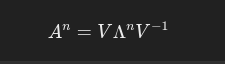

In [ ]:
# decompose a(transition matrix) into V, Lambda, and V_inverse
V = eigenvectors
V_inv = np.linalg.inv(V)
Lambda = np.diag(eigenvalues)

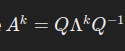

In [ ]:
# predict after 4 weeks using eigen decomposition

n_weeks = 4
A4_eigen = np.dot(np.dot(V, np.linalg.matrix_power(Lambda, n_weeks)), V_inv)

In [ ]:
A4_eigen.shape

(2, 2)

In [ ]:
X_test.shape

(2, 30)

In [ ]:
A4_eigen

array([[0.31189644, 0.19562721],
       [0.42845213, 0.73008966]])

In [ ]:
pred_state_eigen = np.dot(A4_eigen, X_test)

print("predicted state after 4 weeks (using eigen decomposition):")
pred_state_eigen.T

predicted state after 4 weeks (using eigen decomposition):


array([[0.25889255, 0.37017369],
       [0.29758574, 0.47747182],
       [0.37162947, 0.63636443],
       [0.24790284, 0.3894176 ],
       [0.26587857, 0.43373171],
       [0.30308594, 0.58717598],
       [0.38073153, 0.74253066],
       [0.3882636 , 0.65830611],
       [0.25127431, 0.47010612],
       [0.30961368, 0.51203767],
       [0.20225662, 0.29517016],
       [0.25096792, 0.33723669],
       [0.27217978, 0.47936327],
       [0.30763275, 0.53920095],
       [0.27128148, 0.52873403],
       [0.20082327, 0.54249025],
       [0.19095121, 0.52101233],
       [0.23247357, 0.65053969],
       [0.23389587, 0.60701039],
       [0.20316136, 0.6099789 ],
       [0.18662778, 0.53981014],
       [0.15045415, 0.46176723],
       [0.17094103, 0.56575805],
       [0.22519524, 0.58526321],
       [0.22131522, 0.66473625],
       [0.2703034 , 0.65444713],
       [0.23174293, 0.67748228],
       [0.20370244, 0.6071731 ],
       [0.17597968, 0.56856886],
       [0.16900736, 0.52417279]])

In [ ]:
final_ent_val_eigen = pred_state_eigen.T[:, 1]
final_tech_val_eigen = pred_state_eigen.T[:, 0]

In [ ]:
# creator with max tech val after 4 weeks
np.argmax(final_tech_val_eigen), np.max(final_tech_val_eigen)

(7, 0.38826360465316473)

In [ ]:
# creator with max ent val after 4 weeks
np.argmax(final_ent_val_eigen), np.max(final_ent_val_eigen)

(6, 0.7425306552690494)

In [ ]:
# creators who switched from tech focused to entertainment focused
np.where(final_tech_val_eigen > final_ent_val_eigen)

(array([], dtype=int64),)

In [ ]:
# creators who switched from entertainment focused to tech focused
np.where(final_ent_val_eigen > final_tech_val_eigen)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),)

In [ ]:
(final_tech_val_eigen/final_ent_val_eigen).T

array([0.69938128, 0.62325299, 0.58398843, 0.63659897, 0.61300238,
       0.51617565, 0.51274856, 0.58979189, 0.53450551, 0.60466974,
       0.68522043, 0.74418927, 0.5677944 , 0.57053451, 0.51307739,
       0.37018779, 0.36650036, 0.35735494, 0.38532432, 0.33306293,
       0.34572856, 0.32582249, 0.30214511, 0.384776  , 0.33293689,
       0.41302557, 0.34206493, 0.3354932 , 0.30951339, 0.32242681])

In [ ]:
(curr_tech_val/curr_ent_val)

array([ 25.72338929,   5.78220403,   3.74054313,   6.87577592,
         5.11467396,   1.99721759,   1.93827846,   3.96922854,
         2.34790867,   4.65383252,  16.63610752, -50.00654994,
         3.19005758,   3.2752421 ,   1.94385214,   0.48694434,
         0.46459334,   0.41107869,   0.58373362,   0.28096936,
         0.34674375,   0.24522998,   0.13684263,   0.5800784 ,
         0.280336  ,   0.78496077,   0.32727415,   0.29326092,
         0.16925763,   0.22890827])

In [ ]:
np.where((final_tech_val_eigen/final_ent_val_eigen) > (curr_tech_val/curr_ent_val))

(array([11, 19, 21, 22, 24, 26, 27, 28, 29]),)

In [ ]:
np.where((final_ent_val_eigen/final_tech_val_eigen) > (curr_ent_val/curr_tech_val))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 20, 23, 25]),)